#### EXPLORATORY DATA ANALYSIS

Total number of studies: 10
Total number of slices across all scans: 36816
Average number of slices per study: 3681.60

Total number of series per study:
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.156618458422978822822335971869: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.179926192573878616596153758496: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.193241055656414949090207821605: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.202128825827009854792580489975: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.208962973581011466719041210639: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.222993894345836169253703951249: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.273873499396396267864941267496: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.280050083021766496264016832213: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.303407883137142435506738687070: 1 series
  Study 1.3.6.1.4.1.14519.5.2.1.6279.6001.344370459068774891776634727699: 1 series

Total number of

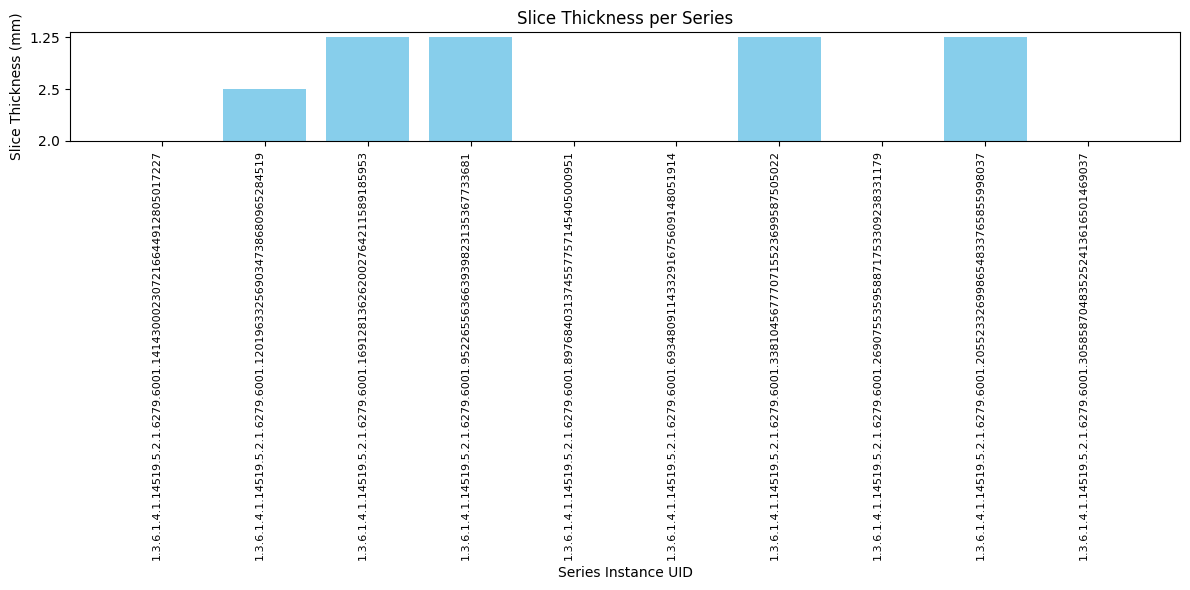

In [ ]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

class DatasetSummary:
    def __init__(self, db_path):
        self.conn = sqlite3.connect(db_path)
        self.cursor = self.conn.cursor()

    def get_total_number_of_studies(self):
        self.cursor.execute('''SELECT COUNT(DISTINCT StudyInstanceUID) FROM Study''')
        total_studies = self.cursor.fetchone()[0]
        return total_studies
    
    def get_total_number_of_series_per_study(self):
        self.cursor.execute('''SELECT StudyInstanceUID, COUNT(DISTINCT SeriesInstanceUID)
                               FROM Series 
                               GROUP BY StudyInstanceUID''')
        series_per_study = {row[0]: row[1] for row in self.cursor.fetchall()}
        return series_per_study

    def get_total_number_of_slices(self):
        self.cursor.execute('''SELECT SUM(NumberOfSlices) FROM Series''')
        total_slices = self.cursor.fetchone()[0]
        return total_slices

    def get_average_slices_per_study(self):
        self.cursor.execute('''SELECT StudyInstanceUID, SUM(NumberOfSlices) 
                               FROM Series 
                               GROUP BY StudyInstanceUID''')
        slices_per_study = [row[1] for row in self.cursor.fetchall()]
        average_slices = np.mean(slices_per_study)
        return average_slices
    
    def get_slice_thickness_and_slices_per_series(self):
        # Fetch slice thicknesses, their corresponding SeriesInstanceUID, and the number of slices 
        self.cursor.execute('''SELECT SeriesInstanceUID, SliceThickness, NumberOfSlices 
                               FROM Series WHERE SliceThickness IS NOT NULL''')
        series_data = self.cursor.fetchall()
 
        series_ids = [row[0] for row in series_data]
        thickness_values = [row[1] for row in series_data]
        num_slices_values = [row[2] for row in series_data]
        
        return series_ids, thickness_values, num_slices_values

    def generate_summary(self):
        total_studies = self.get_total_number_of_studies()
        total_slices = self.get_total_number_of_slices()
        average_slices_per_study = self.get_average_slices_per_study()
        series_per_study = self.get_total_number_of_series_per_study()
        series_ids, slice_thickness_values, num_slices_values= self.get_slice_thickness_and_slices_per_series()

        print(f"Total number of studies: {total_studies}")
        print(f"Total number of slices across all scans: {total_slices}")
        print(f"Average number of slices per study: {average_slices_per_study:.2f}")
        print("\nTotal number of series per study:")
        for study_uid, num_series in series_per_study.items():
            print(f"  Study {study_uid}: {num_series} series")
        # Display total slices per series
        print("\nTotal number of slices per series:")
        for i, series_id in enumerate(series_ids):
            print(f"  Series {series_id[:8]}: {num_slices_values[i]} slices")

        #Plotting Thickness distribution graph across series
        if series_ids and slice_thickness_values:
            plt.figure(figsize=(12, 6))
            plt.bar(series_ids, slice_thickness_values, color='skyblue')
            plt.title('Slice Thickness per Series')
            plt.xlabel('Series Instance UID')
            plt.ylabel('Slice Thickness (mm)')
            plt.xticks(rotation=90, ha='right', fontsize=8)  
            plt.tight_layout() 
            plt.show()
        else:
            print("Plotting Thickness Values N/A")

db_path = 'dicom_data.db'  
summary = DatasetSummary(db_path)
summary.generate_summary()
